In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


In [3]:

# 1. WAV dosyasını yükle
y, sr = librosa.load("audio_example.mp3", sr=None)  # sr=None orijinal sample rate

# 2. Zaman eksenini oluştur
duration = len(y) / sr
time = np.linspace(0, duration, len(y))

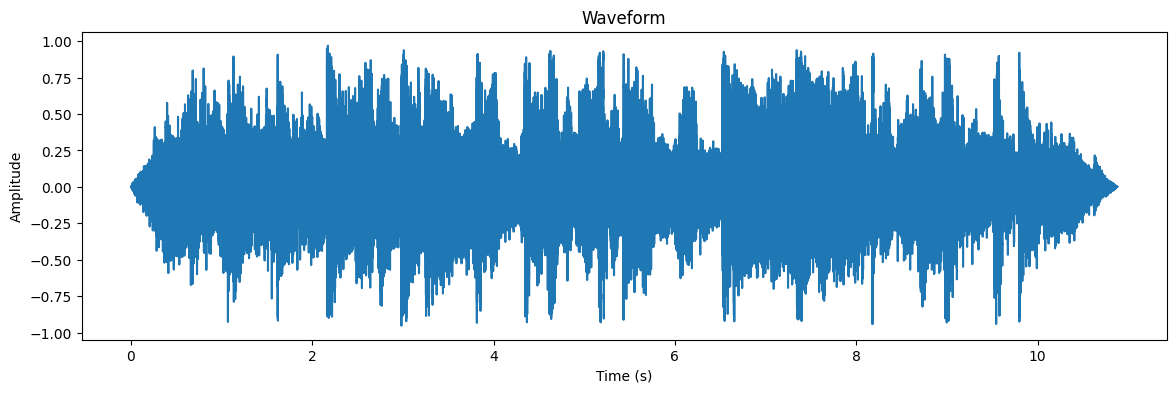

In [4]:

# 3. Zaman dizisini çiz (waveform)
plt.figure(figsize=(14, 4))
plt.plot(time, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()


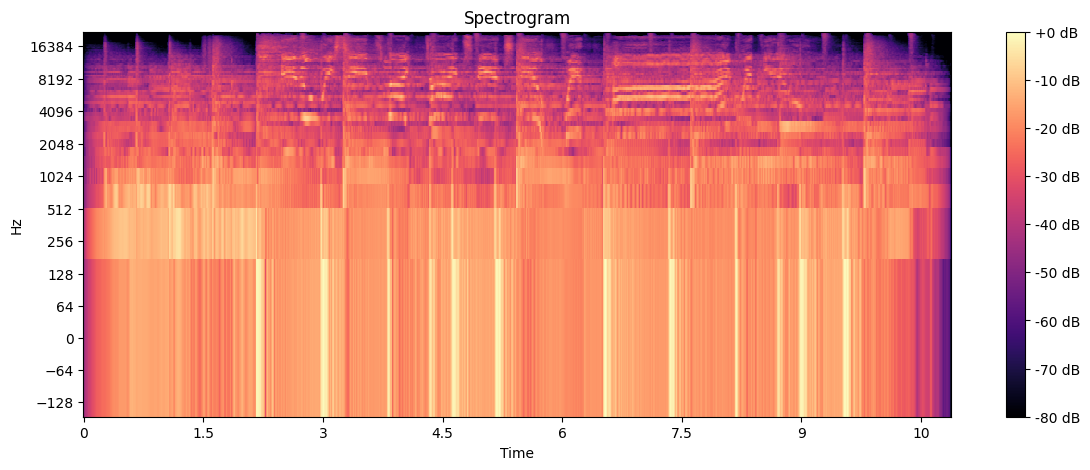

In [14]:

# 4. Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()


In [ ]:
S_db.shape  

(1025, 938)

Spectrogram shape: (64, 938)
Sequence shape: (938, 64)


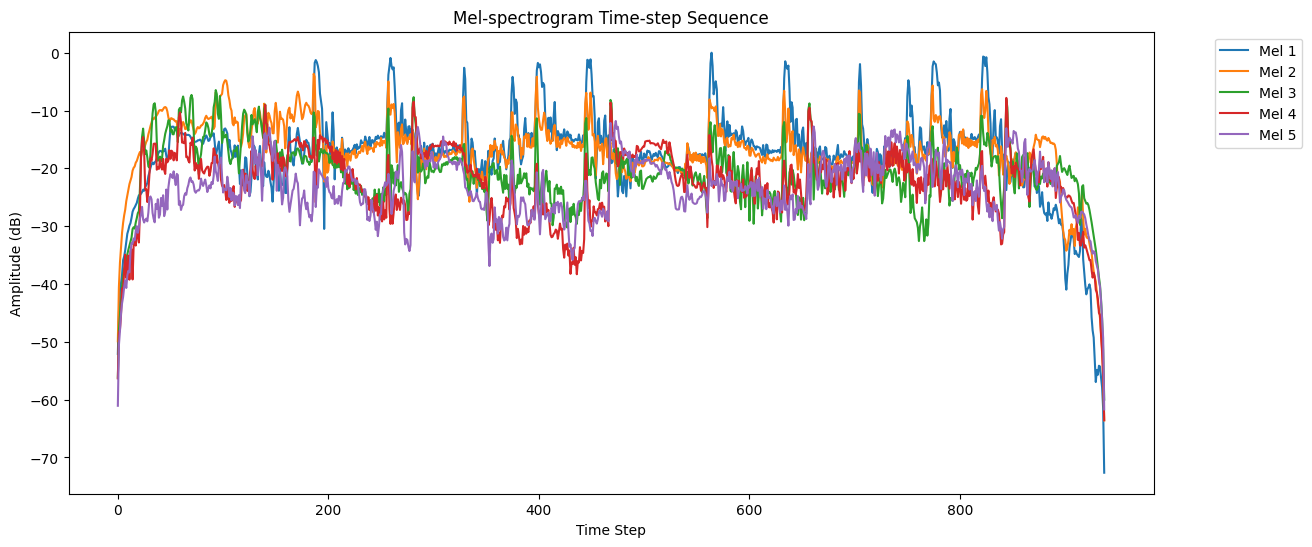

In [22]:
sequence = S_db.T  # shape: (n_frames, n_mels)
print("Spectrogram shape:", S_db.shape)
print("Sequence shape:", sequence.shape)

plt.figure(figsize=(14, 6))
for i in range(5):
    plt.plot(sequence[:, i], label=f'Mel {i+1}')

plt.xlabel("Time Step")
plt.ylabel("Amplitude (dB)")
plt.title("Mel-spectrogram Time-step Sequence")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.show()

In [25]:
y, sr = librosa.load("audio_example.mp3", sr=None)

# STFT
D = librosa.stft(y, n_fft=1024, hop_length=512)

# (Opsiyonel) bazı frekansları filtrele veya ayır
D_filtered = D.copy()
# örnek: sadece düşük frekansları al
D_filtered[100:, :] = 0

# iSTFT ile geri dönüş
y_reconstructed = librosa.istft(D_filtered, hop_length=512)

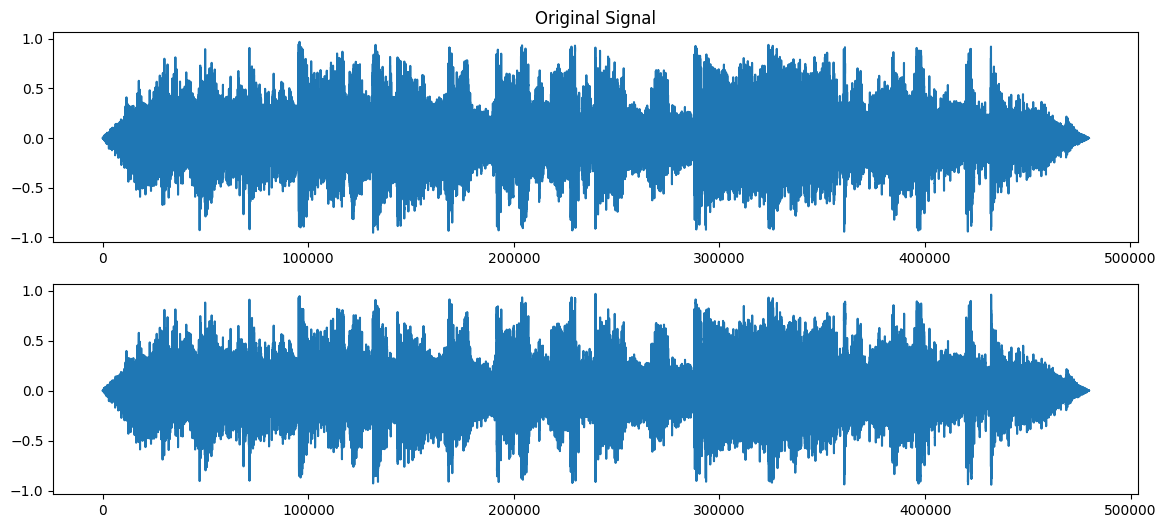

In [26]:

# Orijinal ve yeniden oluşturulan sinyalleri karşılaştır
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title("Original Signal")
plt.subplot(2, 1, 2)
plt.plot(y_reconstructed)

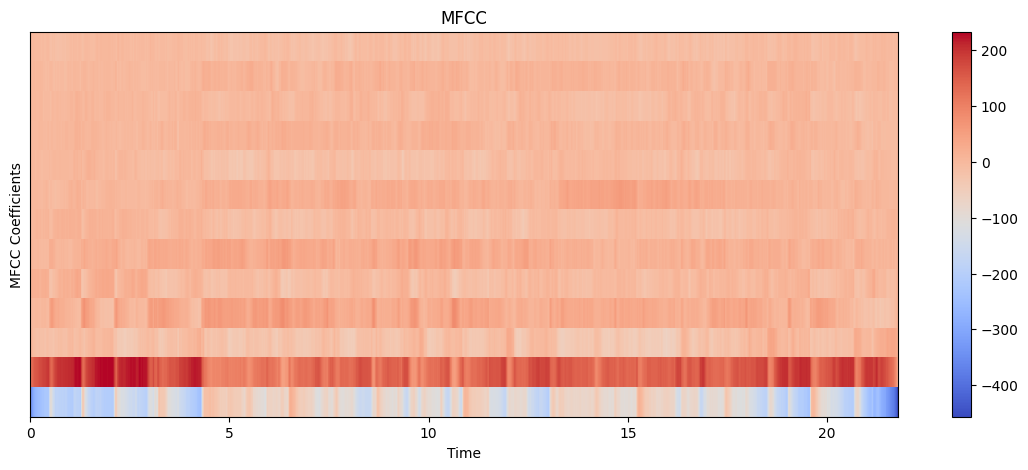

In [6]:


# 5. MFCC (zaman dizisi olarak)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.ylabel("MFCC Coefficients")
plt.title("MFCC")
plt.show()
